Run with python3.9.7

# Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Plot Data

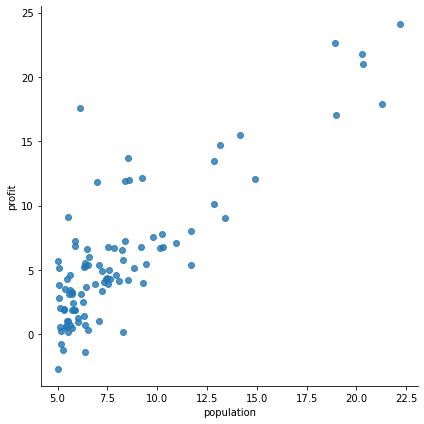

In [4]:
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=False)
plt.show()

# Data handling

In [5]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

def get_Y(df):
    return np.array(df.iloc[:, -1])

## Cost Function

In [6]:
X = get_X(df)
Y = get_Y(df)

theta = np.zeros(X.shape[1])

In [7]:
def lr_cost(theta, X, Y):
    m = X.shape[0]

    inner = X.dot(theta) - Y
    square_sum = inner.T.dot(inner)
    cost = square_sum/(2 * m)
    return cost

lr_cost(theta, X, Y)


32.072733877455676

## Gradient Descent

In [8]:
def gradient(theta, X, Y):
    m = X.shape[0]

    inner = X.T.dot(X.dot(theta) - Y )

    return inner/m


def batch_gradient_desc(theta, X, Y, epoch, alpha = 0.01):
    cost_data = [lr_cost(theta, X, Y)]
    _theta = theta.copy()

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, Y)
        cost_data.append(lr_cost(_theta, X, Y))
    
    return _theta, cost_data

In [9]:
epoch = 500
final_theta, cost_data = batch_gradient_desc(theta, X, Y, epoch)

final_theta

lr_cost(final_theta, X, Y)

4.713809531116866

## Visualize Cost Data

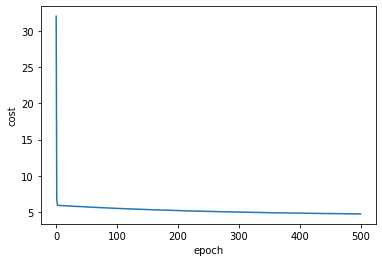

In [10]:
ax = sns.lineplot(x=np.arange(epoch+1), y=cost_data)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()

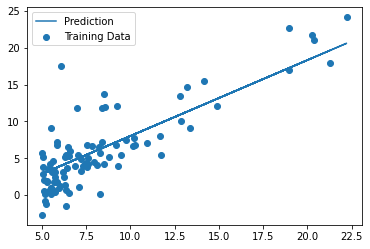

In [11]:
b = final_theta[0]
m = final_theta[1]

plt.scatter(df.population, df.profit, label='Training Data')
plt.plot(df.population, b + m * df.population, label='Prediction')
plt.legend(loc=2)
plt.show()

## Multiple Variable Linear Regression

### Feature Normalization

In [21]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
print(raw_data.head())

def normalize_feature(df):
    return df.apply(lambda column : (column - column.mean()) / (column.std()))

data = normalize_feature(raw_data)
data.head()

   square  bedrooms   price
0    2104         3  399900
1    1600         3  329900
2    2400         3  369000
3    1416         2  232000
4    3000         4  539900


,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Gradient Descent

In [22]:
X = get_X(data)
print(X.shape, type(X))

Y = get_Y(data)
print(Y.shape, type(Y))

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


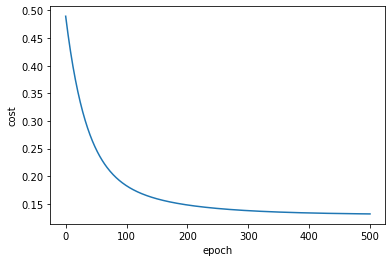

In [25]:
alpha = 0.01
theta = np.zeros(X.shape[1])
epoch = 500

final_theta, cost_data = batch_gradient_desc(theta, X, Y, epoch, alpha=alpha)

sns.lineplot(x = np.arange(epoch + 1), y = cost_data)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [26]:
final_theta

array([-1.16537985e-16,  8.30383883e-01,  8.23982853e-04])

### Different Learning Rates
If you picked the learning rate within a good range, you will converge in 50 epochs.

Try values like 0.3, 0.1, 0.03, 0.01 and so on

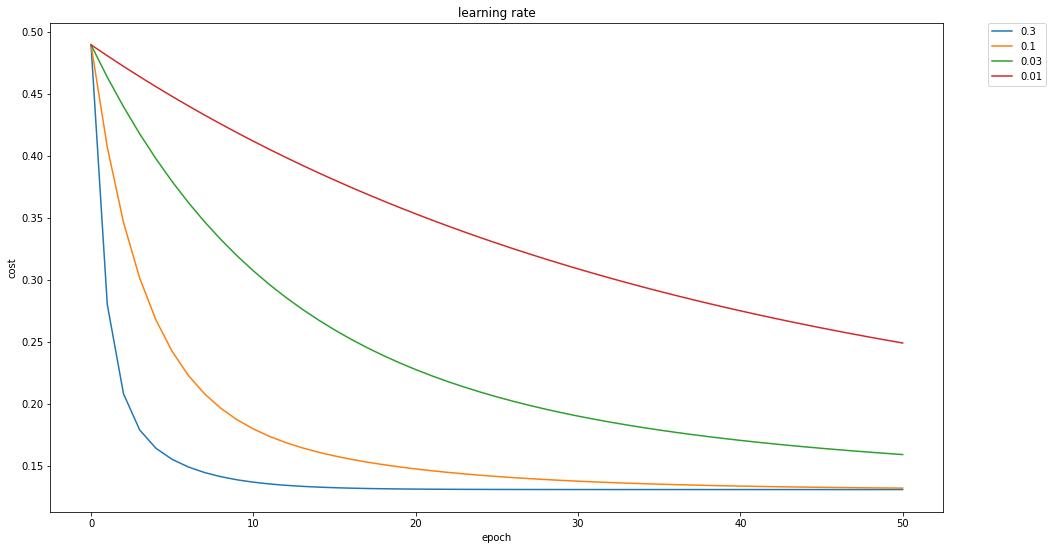

In [29]:
candidate = [0.3, 0.1, 0.03, 0.01]

epoch = 50
fig, ax = plt.subplots(figsize=(16, 9))

for alpha in candidate:
    _, cost_data = batch_gradient_desc(theta, X, Y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch + 1), cost_data, label=alpha)

ax.set_xlabel('epoch')
ax.set_ylabel('cost')
ax.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
ax.set_title('learning rate')
plt.show()

## Normal Equation
Resolve the equation to find the best theta：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 
 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

In [35]:
def normal_equation(X, Y):
    return np.linalg.inv((X.T).dot(X)).dot(X.T).dot(Y)

final_theta2= normal_equation(X, Y)
final_theta2

array([-1.11022302e-16,  8.84765988e-01, -5.31788197e-02])